In [1]:
#Author: Anh Phan (GitHub: @anhphan1, Email: anhphan@udel.edu, Phone: (302) 345-5885)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [6]:

symbols = ['AAPL', 'MSFT', 'AMD', 'INTC', 'NVDA']
start = '2016-01-01'
end = '2019-01-01'

In [8]:
df = pd.DataFrame()
data = []
for symbol in symbols:
    df = pd.merge(df, pd.DataFrame(yf.download(symbol, 
                           start=start, end=end)['Adj Close']), 
                           right_index=True, left_index=True, how='outer')
       
    # Appends tickers which have data
    data.append(symbol)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [9]:
df.columns = data
df = df.dropna(axis='columns')
df.head()

,AAPL,MSFT,AMD,INTC,NVDA
Date,,,,,
2016-01-04,24.009066,48.797718,2.77,27.312061,7.900972
2016-01-05,23.407417,49.020355,2.75,27.183493,8.027896
2016-01-06,22.949337,48.129875,2.51,26.580849,7.695941
2016-01-07,21.980772,46.455791,2.28,25.584467,7.390838
2016-01-08,22.097002,46.598270,2.14,25.319305,7.232183


In [10]:
df.describe()

,AAPL,MSFT,AMD,INTC,NVDA
count,754.000000,754.000000,754.000000,754.000000,754.000000
mean,34.867751,70.626554,11.618581,33.855911,35.890917
std,9.353271,19.848672,6.300744,6.967870,19.883670
min,20.826063,43.738876,1.800000,22.875263,6.155778
25%,25.695020,52.490255,6.852500,28.876394,16.290477
50%,35.813461,65.735847,11.585000,30.621445,36.362171
75%,41.410726,88.155222,13.820000,40.429544,54.916790
max,55.565311,109.532562,32.720001,49.333492,71.712654


## Calculate Stock Returns

In [11]:
from IPython.display import Latex, HTML

Latex(r"""\begin{eqnarray}r_t = \frac{AdjClose_t - AdjClose_{t-1}}{AdjClose_{t-1}} = \frac{AdjClose_t}{AdjClose_{t-1}} - 1
\end{eqnarray}""")

<IPython.core.display.Latex object>

([<matplotlib.axis.YTick at 0x14d0b2410>,
 [Text(0, 0, 'AAPL'),
  Text(0, 1, 'MSFT'),
  Text(0, 2, 'AMD'),
  Text(0, 3, 'INTC'),
  Text(0, 4, 'NVDA')])

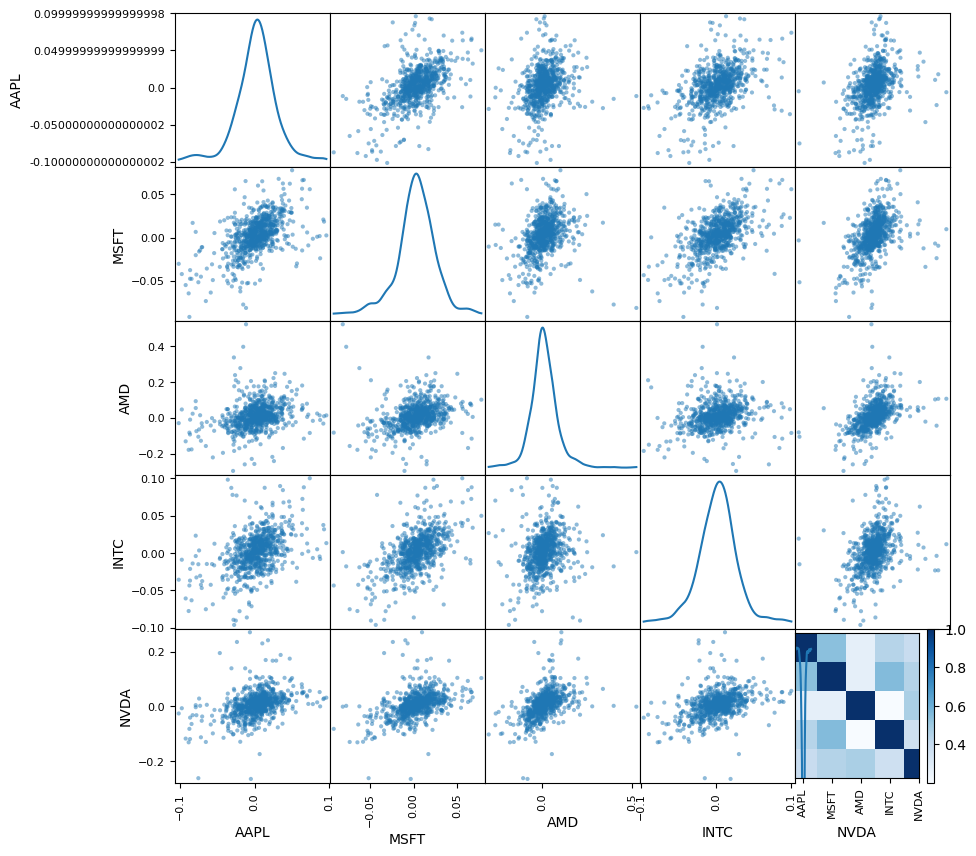

In [12]:
from pandas.plotting import scatter_matrix

rets = df.pct_change(periods=3)
scatter_matrix(rets, diagonal='kde', figsize=(10, 10))
corr = rets.corr()
plt.imshow(corr, cmap='Blues', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns)

Text(0, 0.5, 'Standard Deviations')

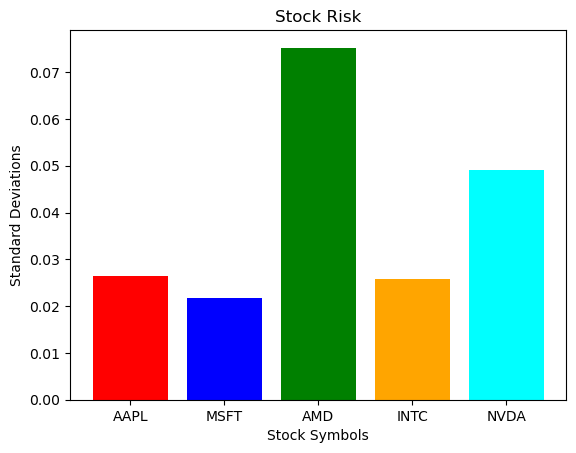

In [13]:
plt.bar(rets.columns, rets.std(), color=['red', 'blue', 'green', 'orange', 'cyan'])
plt.title("Stock Risk")
plt.xlabel("Stock Symbols")
plt.ylabel("Standard Deviations")

Text(0,0.5,'Returns')

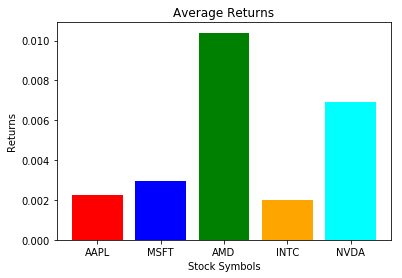

In [9]:
plt.bar(rets.columns, rets.mean(), color=['red', 'blue', 'green', 'orange', 'cyan'])
plt.title("Average Returns")
plt.xlabel("Stock Symbols")
plt.ylabel("Returns")

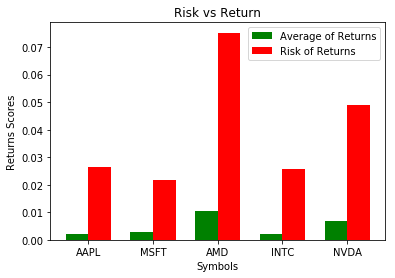

In [10]:
ind = np.arange(5)
width = 0.35       
plt.bar(ind, rets.mean(), width, color = 'g', label='Average of Returns')
plt.bar(ind + width, rets.std(), width, color = 'r', label='Risk of Returns')
plt.ylabel('Returns Scores')
plt.xlabel('Symbols')
plt.title('Risk vs Return')

plt.xticks(ind + width / 2, ('AAPL', 'MSFT', 'AMD', 'INTC', 'NVDA'))
plt.legend(loc='best')
plt.show()

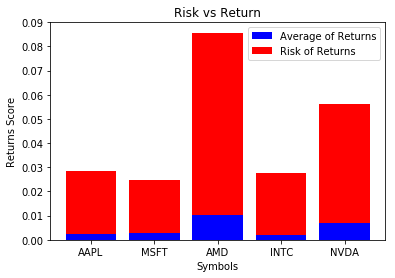

In [11]:
symbols = ['AAPL', 'MSFT', 'AMD', 'INTC', 'NVDA']
ind = [x for x, _ in enumerate(symbols)]

plt.bar(ind, rets.mean(), width=0.8, label='Average of Returns', color='b')
plt.bar(ind, rets.std(), width=0.8, label='Risk of Returns', color='r', bottom=rets.mean())

plt.xticks(ind, symbols)
plt.ylabel("Returns Score")
plt.xlabel("Symbols")
plt.legend(loc="upper right")
plt.title('Risk vs Return')
plt.show()

## Risk vs Expected Return

Table: Risk vs Expected Returns


,Expected Returns,Risk
AAPL,0.002242,0.026369
MSFT,0.002963,0.021786
AMD,0.010391,0.075234
INTC,0.001983,0.025785
NVDA,0.006929,0.049038


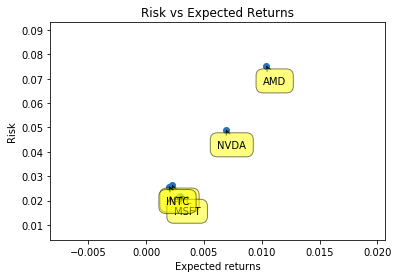

In [12]:
plt.scatter(rets.mean(), rets.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.title('Risk vs Expected Returns')
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.7', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
    
d = {'Risk':rets.std(), 'Expected Returns':rets.mean()}
print('Table: Risk vs Expected Returns')
tables = pd.DataFrame(data=d)
tables    